# K-NN (Nearest Neigbor: 최근접 이웃)


In [32]:
# import libraries 
import numpy as np 
import pandas as pd 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns 


In [20]:
# load the datasets 
x,y=load_iris(return_X_y=True) 

# split the datasets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=1)

In [24]:
# Instantiate Learning model(k=3)
knn=KNeighborsClassifier(n_neighbors=3)

# Fitting the model 
knn.fit(x_train,y_train)

# Predicting the Test set results 
y_hat=knn.predict(x_test)

In [27]:
# Evaluating predictions
# Building confusion matrix: 
cm=confusion_matrix(y_test,y_hat)
cm 


array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

In [28]:
# Accuracy
accuracy=accuracy_score(y_test,y_hat)
print(f'정확도:{accuracy:.03f}')

정확도:0.978


In [29]:
# Using the Cross-Validation for Parameter tuning 
# Creating list of K for KNN 
k_list=list(range(1,50,2))

# Creating list of cv scores 
cv_scores=[]

# Perform 10-fold cross validation
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

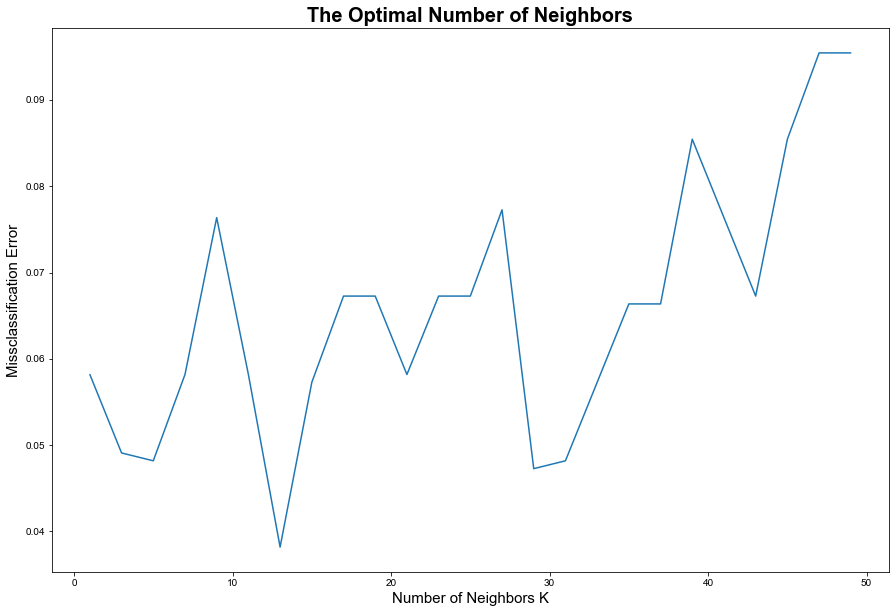

In [33]:
# Changing to misclassification error
MSE = [1 -x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The Optimal Number of Neighbors',fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Missclassification Error',fontsize=15)
sns.set_style('whitegrid')
plt.plot(k_list,MSE)

plt.show()

In [34]:
# Finding best k 
best_k=k_list[MSE.index(min(MSE))]
print(f'optimal k : {best_k}')

optimal k : 13
